In [40]:
import pywt as wt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.interpolate import make_interp_spline

### Importing Data

In [3]:
#importing
spectra=pd.read_csv("spectra.dat",sep="\s+",header=None)

# I haven't used the .dat fie format before
# There are two locations where columns aren't separated by whitespace.
spectra.index[spectra[2].isnull()].tolist()

# I am just going to fix those manually, rather than write something to do it
# Maybe there is a better way?
spectra[0][1032]='9.3250'
spectra[1][1032]='10472.0000'
spectra[2][1032]='1142.0000'

spectra[0][1033]='9.3350'
spectra[1][1033]='10570.0000'
spectra[2][1033]='1234.0000'

spectra[0]=spectra[0].values.astype("float")

<ipython-input-3-83acc93a104f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra[0][1032]='9.3250'
<ipython-input-3-83acc93a104f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra[1][1032]='10472.0000'
<ipython-input-3-83acc93a104f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra[2][1032]='1142.0000'
<ipython-input-3-83acc93a104f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Text(0.5, 1.0, 'Large Angle')

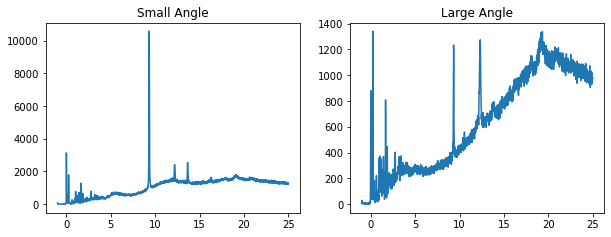

In [8]:
#Split up imported data into the three arrays I will use
E=np.array(spectra[0]) #energy
cnt_sml=np.array(spectra[1]) #counts for small angle
cnt_lrg=np.array(spectra[2]) #counts for large angle

plt.figure(figsize=(10,3.5))
#Small scattering angle plot
plt.subplot(1,2,1)
plt.plot(E,cnt_sml)
plt.title("Small Angle")

#Large scattering angle plot
plt.subplot(1,2,2)
plt.plot(E,cnt_lrg)
plt.title("Large Angle")

### Discrete Wavelet Transform, Background Subtraction

In this section, I use the pywt pacakge to find the decomoposition levels of both of the plots to choose which approximation level is best to use for background

In [12]:
#Returns the approximation of decomposition of level "level"
def get_apx(arr,level): 
    output=wt.wavedec(arr,wavelet="bior3.9",level=level) #Deconstruct Wave
    for i in range(1,len(output)):
        output[i]=output[i]*0
    recon=wt.waverec(output,wavelet='bior3.9') #Reconstruct all but last level
    return recon

#Returns the detail level "det_level" of decomposition of level "level"
def get_details(arr,level,det_level):
    det_ind=level-det_level+1
    output=wt.wavedec(arr,wavelet="bior3.9",level=level) #Deconstruct wave
    for i in range(1,len(output)):
        if i==det_ind: 
            pass
        else:
            output[i]=output[i]*0
    recon=wt.waverec(output,wavelet='bior3.9') #Reconstruct only detail level
    return recon

#Plotting function
def plot_decomp(num_plots, spec): 

    fig = plt.figure(figsize=(8, num_plots))
    gs = gridspec.GridSpec( num_plots,2, width_ratios=[1,1],
             wspace=.3, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 

    for i in range(num_plots):
        ax= plt.subplot(gs[i,0])
        ax.plot(E,get_apx(spec,i))
        if i<num_plots-1:
            ax.set_xticklabels([])
        ax.set_yticklabels([])
        if i==0:
            ax.set_ylabel("")
        else:
            ax.set_ylabel("A"+str(i))

    ax.set_xlabel("Excitation Energy (MeV)")

    for i in range(num_plots):
        ax= plt.subplot(gs[i,1])

        if i<num_plots-1:
            ax.set_xticklabels([])
        ax.set_yticklabels([])
        if i==0:
            ax.set_ylabel("")
            ax.plot(E,get_apx(spec,i),color="C1")
        else:
            ax.set_ylabel("D"+str(i))
            ax.plot(E,get_details(spec,num_plots,i),color="C1")

    ax.set_xlabel("Excitation Energy (MeV)")
    plt.suptitle("Approximations \t \t \t \t \t \t Details ".expandtabs())

C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 9 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 11 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 11 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 11 is too hi

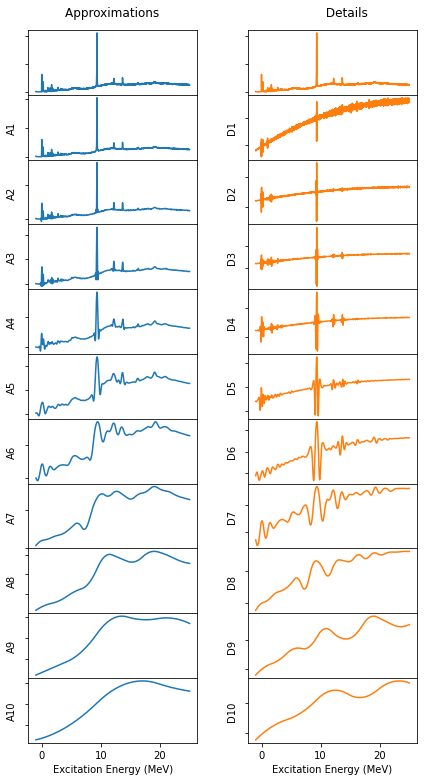

In [14]:
plot_decomp(11,cnt_sml) # The "11" here tells you what to level to decompose to

C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 9 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 11 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 11 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 11 is too hi

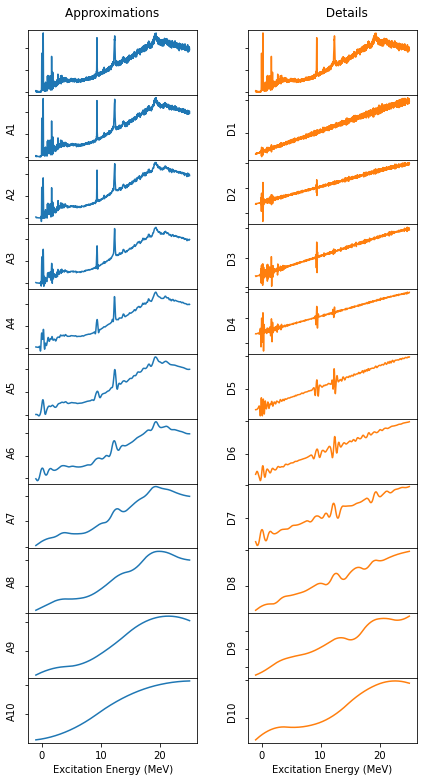

In [15]:
plot_decomp(11,cnt_lrg)

In [18]:
#Background Subtraction Function
def bg_sub(arr,bgnum,min_energy): 
    #Arr is the array to use for bg sub (cnt_sml or cnt_lrg)
    #Bgnum is the level you want to background subtract from
    #min_energy is the minimum energy you want to consider when bg subtracting
    
    #This function takes the approximation level "bgnum", and scales it so that
    #it's maximium is the minimum value of "arr". Normally, this scales is by
    #roughly 1/1000, but setting min_energy > 0 will only scale the background
    #so it's maximum is the minimum value of "arr" where energy is > min_energy
    
    splice=E>min_energy
    recon=get_apx(arr,bgnum)
    recon=recon[splice]
    arr=arr[splice]
    adj_recon=min(arr/recon)*recon
    return arr-adj_recon

C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too 

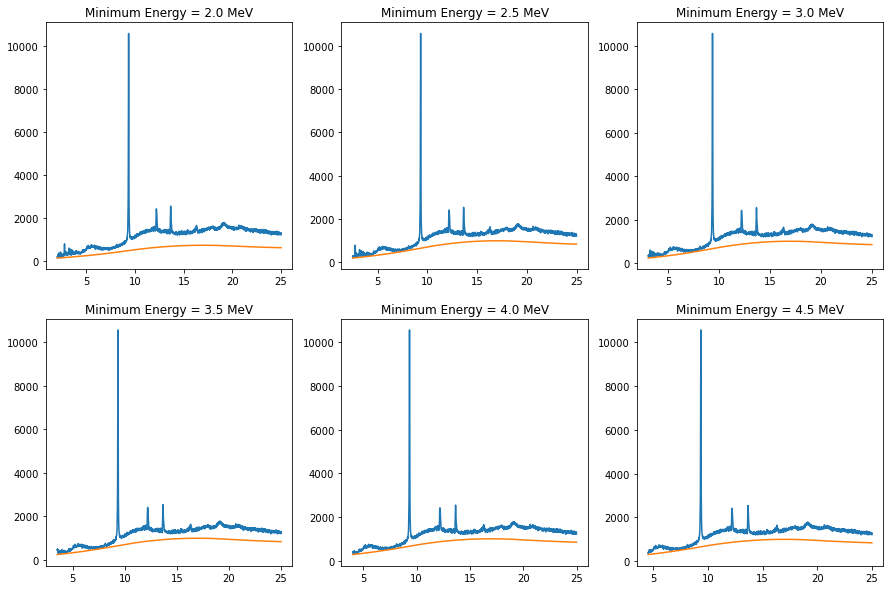

In [19]:
#Plot different values to for min energy
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    e_min=2+i*0.5 #MeV
    E_sp=E[E>e_min]
    cnt_sp=cnt_sml[E>e_min]

    plt.plot(E_sp,cnt_sp)
    #plt.plot(E_sp,bg_sub(cnt_sml,10,e_min))
    plt.plot(E_sp,cnt_sp-bg_sub(cnt_sml,10,e_min))
    plt.title("Minimum Energy = "+str(e_min)+" MeV")

In each of the above plots, blue is the original spectrum, and the orange is the background approximation (using approximation level 10).

With the DWT background subtraction, I introduced two parameters, summarized below:

* Min Energy: The  Poltoratska et al paper had spectra from energy of about 7 MeV to 20 MeV, which worked well for their background subtraction. Since this data starts at 0 MeV, the background estimates are very low. To fix this, I cut off the spectra at some minimum energy, and only fit the background to that part of the spectrum
* Approximation Level: What level of the DWT to use as background. For both large and small angles, it looks like "10" is the right number to use, but 9 or 11 might work just as well.

### Smoothing

To define the autocorrelation plot, you essentially need a continuous spectrum (or very very detailed, with an energy resultion on the order of 0.1 keV). Currently, the energy resolution is about 10 KeV. Therefore, the spectrum need to be "smoothed", which is done with a Gaussian convolution. To do this, I use the scipy's function "gaussian_filter." 

First, I essentially increase the detail of the spectrum 500-fold. If originally, the spectrum looked like [1.1, 2.5, 0.9], then the new specturm would be [1.1, 1.1, ... , 1.1, 2.5, 2.5, ..., 2.5, 0.9, 0.9, ... , 0.9], where there are now 500 copies of each value. This essentially corresponds to making the energy resolution 500 times smaller, so 0.02 keV.

Then, there are two convolutions performed. One is a finer convolution, that uses $\sigma=250$, so it folds every 250 consecutive values together with a gaussian function. This is the approximation of the continuous spectrum. The other one is a wider convolution, with $\sigma_>=750$, which attempts to get rid of fine details in the spectrum. 

The function $d$ is defined as a ratio between the finer convolution ($g$), and the smoother convolution ($g_>$), $d=\frac{g_>}{g}$


In [30]:
from scipy.ndimage import gaussian_filter

def get_d(spectra1,sigma_gr=1.5,sigma_le=0.5,det=500):
    
    #Increase detail of spectrum
    spectra_det=[]
    for val in spectra1:
        for i in range(det):
            spectra_det.append(val)
            
    #Perform Convolutions
    g=gaussian_filter(spectra_det,sigma=sigma_le*det)
    g_gr=gaussian_filter(spectra_det,sigma=sigma_gr*det)
    
    return g_gr/g, g, g_gr

In [31]:
d,g,gr=get_d(cnt_sml)

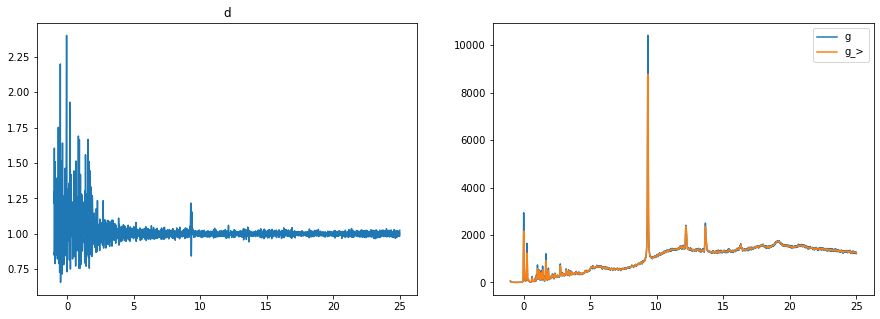

In [38]:
E_fine=np.arange(E.min(),E.max()+.01,0.02/1000)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(E_fine,d)
plt.title("d")

plt.subplot(1,2,2)
plt.plot(E_fine,g,label="g")
plt.plot(E_fine,gr,label="g_>")
plt.legend()

Two more parameters are introduced here: the widths of the two gaussian filters. Both are measured in terms of the energy resolution of the original specturm. Right now $\sigma$=0.5, and $\sigma_>=1.5$. Poltoratska's paper says these are roughly the correct widths to use. 

I am ***very*** unsure if this is the correct prodecure to do for smoothing. The paper doesn't talk about it much, so this was sort of my best guess. I think this is causing the error in the autocorrelation plot (see below). 

### Autocorrelation

The autocorrelation function is defined as $$C(\epsilon)=\frac{\langle d(E) \cdot d(E+\epsilon)\rangle}{\langle d(E)\rangle \cdot \langle d(E+\epsilon)\rangle}$$so essentially, the correlation between $d$, and $d$ shifted by some small energy $\epsilon$. 

In [48]:
#This function calculates the correlation between d and shifted d, for some value of epsilon
def get_autocorr(d,epsilon):
    
    #epsilon (measured in energy) corresponds to some "shift" in the array of d
    #this shift parameter is the index shift that corresponds to some value of epsilon
    #if the parameter "det" in the get_d function is changed, this line will also need to be changed
    shift=round(epsilon*50) 
    
    # Calculate shifted d
    d_adj=d[shift:]
    
    #Remove values from the end of the original d, since those won't correspond to any values of the shifted d
    d_orig=d[:-shift]
    
    #Don't do anything if epsilon is 0
    if epsilon==0:
        d_adj=d
        d_orig=d
        
    #Calculate correlation
    num=np.mean(d_adj*d_orig)
    denom=np.mean(d)*np.mean(d_adj)
    return num/denom

In [49]:
#Plotting function for autocorrelation - plots different correlations for different values of epsilon
def get_autocorr_plot(d,smooth_=False):

    eps=np.arange(0,0.5,0.02)
    C=[]

    for ep in eps:
        c_val=get_autocorr(d,ep)
        C.append(c_val) 

    C=np.array(C)-1
    
    # Option to make this plot smooth, just for nice graphing purposes (run an interpolating spline through it)
    if(smooth_):
        # Make smooth plot
        eps_smooth = np.linspace(eps.min(), eps.max(), 500)  
        C_spline = make_interp_spline(eps, C)
        C=C_spline(eps_smooth)        
        eps=eps_smooth
        
    plt.plot(eps,C)
    plt.xlabel("$\epsilon$ (MeV)")
    plt.ylabel("$C(\epsilon)-1$")
    plt.hlines(y=0,xmin=0,xmax=0.5,linestyles="dashed")

### All together

The below code and plot essentially just combines all the parameters and important plots - it should be really useful for visualization (once everything is working!)

In [58]:
#Spectra - the energy spectra you are trying to find level density for
#Decomp level - the Discrete Wavelet transform approximation level you want to use
#Min energy - the minimum energy you want to background subtract from
#Sigmas - gaussian convolution parameters

def level_density(spectra,decomp_level,min_energy,sigma_gr=1.5,sigma_le=0.5):
    plt.figure(figsize=(15,10))
    spect_bg_sub=bg_sub(spectra,decomp_level,min_energy)
    d,g,g_gr=get_d(spect_bg_sub,sigma_gr,sigma_le)
    
    E_sp=E[E>min_energy]
    cnt_sp=spectra[E>min_energy]
    
    E_det=np.linspace(E_sp.min(),E_sp.max(),len(d))
    
    #First Plot - Background Subtraction Process
    plt.subplot(2,2,1)   
    plt.plot(E_sp,cnt_sp,label="Spectrum") #Original Spectra
    plt.plot(E_sp,cnt_sp-spect_bg_sub,label="DWT Background") #Background Subtraction
    plt.title("Background Subtraction")
    plt.legend()
    plt.xlabel("Excitation Energy (MeV)")
    plt.ylabel("Counts")  
    
    #Second Plot - Smoothing Process
    plt.subplot(2,2,2)    
    plt.plot(E_det,g,label="g") #Original Spectra
    plt.plot(E_det,g_gr,label="$g_>$") #Background Subtraction
    plt.title("Smoothing Process")
    plt.legend()
    plt.xlabel("Excitation Energy (MeV)")
    plt.ylabel("Counts") 
    
    #Third Plot - Stationary Spectrum
    plt.subplot(2,2,3) 
    plt.plot(E_det,d)
    plt.title("Dimensionless Stationary Spectrum, d")
    plt.xlabel("Excitation Energy (keV)")
    plt.ylabel("Counts")
    
    #Fourth Plot - Autocorrelation Plot
    plt.subplot(2,2,4) 
    get_autocorr_plot(d)
    plt.title("Autocorrelation Plot")
    
    return d,g,gr

Here is one result for small angle. The big issue in this code is that the autocorrelation plot is essentially just flat. It should sort of start off large, decrease initially and then oscillate around 0 the x-axis. I have not been able to figure out why this doesn't happen. I suspect I didn't do the gaussian convolution correctly, or there is a small bug when calculation the autocorrelation

C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 11 is too high: all coefficients will experience boundary effects.
  warnings.warn(


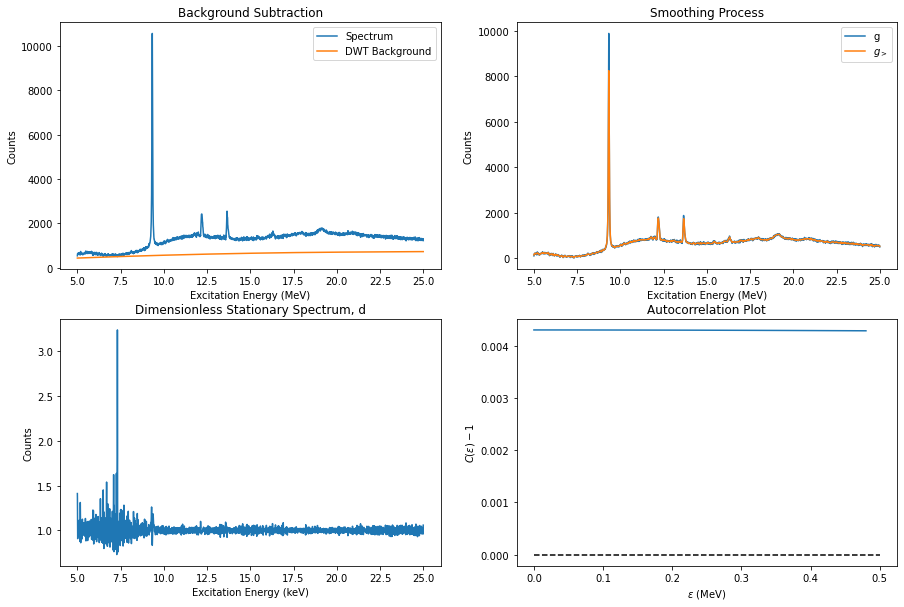

In [62]:
d,g,gr=level_density(cnt_sml,decomp_level=11,min_energy=5,sigma_gr=1.5)

You can see the same error for the large plot. 

C:\Users\16302\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(


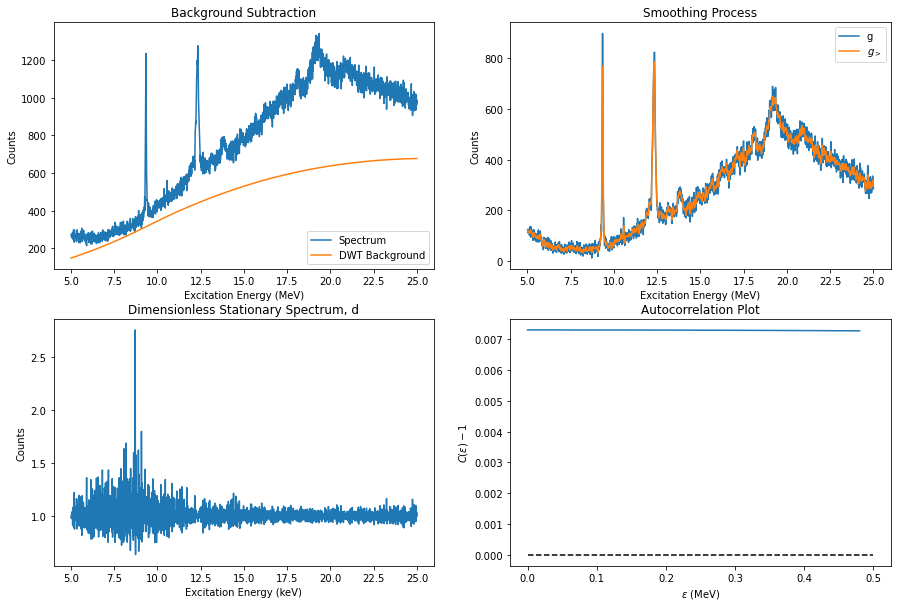

In [52]:
d,g,gr=level_density(cnt_lrg,decomp_level=10,min_energy=5)